In [1]:
!pip3 install finterstellar

In [2]:
import finterstellar as fs

In [3]:
OTP = "16692264001011151161"

In [4]:
terms= fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data={}

for t in terms:
    data[t] = fs.fn_consolidated(otp = OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [6]:
s = {}
signal = {}
y=3

for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Revenue Growth'] = (data[t]['Revenue'] - data[prev_t]['Revenue'])/ abs(data[prev_t]['Revenue'])
        s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor = 0, n=30, asc=False)
        signal[t] = list(s[t].index)
    
df = fs.backtest(signal = signal,data=data, m=3, cost=.001)

CAGR: 17.54%
Accumulated return: 210.20%
Investment period: 7.0yrs
Sharpe ratio: 0.79
MDD: -34.53%


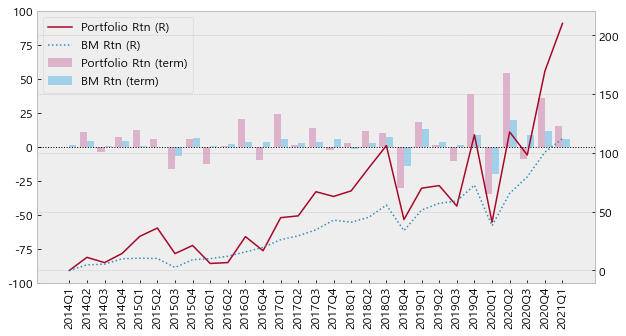

In [7]:
fs.draw_return(df)